# Simpsons Haiku Demo 
## [@SimpsonsHaiku](https://twitter.com/SimpsonsHaiku)

For anyone who knows me, they'll attest that The Simpsons has had an undue impact on my life, being formative through my early years and enduring to the present moment. That contribution spanned curating a sense of humour deeply anchored in an appreciation for the surreal, a continued love of animation, or exposure to the depths of obscure Americana (thank you, John Swartwzelder).

This notebook demonstrates the implementation of an idea I had long ago, inspired by [@nythaikus](https://twitter.com/nythaikus). The dataset used here is hosted [on Kaggle here](https://www.kaggle.com/datasets/prashant111/the-simpsons-dataset), and was originally scraped by [Todd Schneider](https://toddwschneider.com/posts/the-simpsons-by-the-data/), covering the first 26 seasons. We start by loading the core haiku object, of class `SimpsonsHaiku`, and extracting a DataFrame of haikus.

In [1]:
import compuglobal
import matplotlib.pyplot as plt
from haiku import *

In [2]:
simpsons_haiku = SimpsonsHaiku()

100%|███████████████████████████████████████████████████████████████████████| 400929/400929 [00:17<00:00, 22388.46it/s]


In [3]:
script = simpsons_haiku.script

In [4]:
script.spoken_words.iloc[0]

'Ooo, careful, Homer.'

In [5]:
script[script.normalized_text.progress_apply(lambda x: 'diddly' in x)].iloc[0].values

100%|██████████████████████████████████████████████████████████████████████| 224803/224803 [00:02<00:00, 111031.63it/s]


array([25369, 86, 69,
       'Devil: Ahem! I hold here a contract between myself and one Homer Simpson, pledging me his soul for a donut. Which I delivered! And it was scrum-diddly-umptious!',
       378000, True, 346.0, 25.0, 'Devil', 'Simpson Living Room',
       'Ahem! I hold here a contract between myself and one Homer Simpson, pledging me his soul for a donut. Which I delivered! And it was scrum-diddly-umptious!',
       'ahem i hold here a contract between myself and one homer simpson pledging me his soul for a donut which i delivered and it was scrum-diddly-umptious',
       26.0, 86, 'Treehouse of Horror IV', 5, 5, 'Ahem', 1, 2],
      dtype=object)

In [6]:
corpus = script['spoken_words'].str.cat(sep=' ')
for char in [",", ".", "?", "!", ":", "\\", "\""]:#self.strip_list:
    corpus = corpus.replace(char, '')
corpus_list = corpus.lower().replace('-', ' ').replace('/', ' ').split(' ')

corpus_df = pd.DataFrame({'word' : corpus_list})

simpsons_count = corpus_df.value_counts().reset_index(name='counts')
simpsons_count

,word,counts
0,the,95570
1,i,81094
2,you,79830
3,a,72016
4,,71665
...,...,...
42120,street's,1
42121,hippity,1
42122,hippo's,1
42123,streamline,1


In [7]:
df = pd.read_json('simpson_lect.json', orient='index').reset_index().rename({'index':'word', 0:'n_syllable'}, axis=1)
df['syllables_estimate'] = df.word.apply(syllables.estimate)
df['syllapy_estimate'] = df.word.apply(syllapy.count)

df['syllables_error'] = abs(df.word.apply(syllables.estimate) - df['n_syllable'])
df['syllapy_error'] = abs(df.word.apply(syllapy.count) - df['n_syllable'])

In [8]:
# Comparing syllables and syllapy performance on labelled syllable set
df.describe().iloc[1:3, :]

,n_syllable,syllables_estimate,syllapy_estimate,syllables_error,syllapy_error
mean,1.905660,1.802612,1.680697,0.253991,0.285922
std,0.844672,0.825779,0.864138,0.561030,0.669816


In [9]:
# Generate haiku_df, will do so from scratch here but will load from path if it is passed when instantiating SimpsonsHaiku object.
haiku_df = simpsons_haiku.generate_haiku_df(save=True)

100%|█████████████████████████████████████████████████████████████████████████| 30259/30259 [00:02<00:00, 13124.72it/s]


In [10]:
haiku, metadata = simpsons_haiku.generate_haiku()
print('{}, S{:02d}E{:02d}'.format(metadata['n_syllables'].values[0], metadata['season'].values[0], metadata['number_in_season'].values[0]))
print(haiku)

[17], S01E01
If you want one you'll
have to pay for it out of
your own allowance


## Exploratory data analysis

Have you ever wondered which season of The Simpsons had the most haikus? How the average syllable-per-word count trended over the seasons? The maxiumum number of characters that contribute to a 17-syllable sequence of dialogue?  Well here's the notebook section for you!  

In [11]:
# Max number of lines of dialogue in a 17-syllable sequence? It's 16 (Lisa the Simpson)
haiku_df['n_lines'] = haiku_df.number.apply(len)
haiku_df[haiku_df.n_lines == haiku_df.n_lines.max()]

,id_x,number,raw_text,timestamp_in_ms,speaking_line,character_id,location_id,raw_character_text,raw_location_text,spoken_words,normalized_text,word_count,id_y,title,season,number_in_season,spoken_words_split,number_in_line,n_syllables,n_lines
episode_id,,,,,,,,,,,,,,,,,,,,
195,"[54908, 54908, 54908, 54909, 54909, 54909, 549...","[135, 135, 135, 136, 136, 136, 136, 136, 136, ...","[Bart Simpson: Yes! Heh, heh! / Ha! Ha! / Woo ...","[629000, 629000, 629000, 639000, 639000, 63900...","[True, True, True, True, True, True, True, Tru...","[8.0, 8.0, 8.0, 8.0, 8.0, 8.0, 8.0, 8.0, 8.0, ...","[5.0, 5.0, 5.0, 5.0, 5.0, 5.0, 5.0, 5.0, 5.0, ...","[Bart Simpson, Bart Simpson, Bart Simpson, Bar...","[Simpson Home, Simpson Home, Simpson Home, Sim...","[Yes! Heh, heh! / Ha! Ha! / Woo hoo hoo heh he...",[yes heh heh ha ha woo hoo hoo heh heh woo oh ...,"[13.0, 13.0, 13.0, 11.0, 11.0, 11.0, 11.0, 11....","[195, 195, 195, 195, 195, 195, 195, 195, 195, ...",Lisa the Simpson,9,17,Woo Oh Oh Yeah Ha Ha Ha Ha Ha Ha Ha ...,"[9, 11, 12, 1, 2, 3, 4, 5, 6, 7, 9, 10, 11, 1,...","[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1]",16
195,"[54908, 54908, 54909, 54909, 54909, 54909, 549...","[135, 135, 136, 136, 136, 136, 136, 136, 136, ...","[Bart Simpson: Yes! Heh, heh! / Ha! Ha! / Woo ...","[629000, 629000, 639000, 639000, 639000, 63900...","[True, True, True, True, True, True, True, Tru...","[8.0, 8.0, 8.0, 8.0, 8.0, 8.0, 8.0, 8.0, 8.0, ...","[5.0, 5.0, 5.0, 5.0, 5.0, 5.0, 5.0, 5.0, 5.0, ...","[Bart Simpson, Bart Simpson, Bart Simpson, Bar...","[Simpson Home, Simpson Home, Simpson Home, Sim...","[Yes! Heh, heh! / Ha! Ha! / Woo hoo hoo heh he...",[yes heh heh ha ha woo hoo hoo heh heh woo oh ...,"[13.0, 13.0, 11.0, 11.0, 11.0, 11.0, 11.0, 11....","[195, 195, 195, 195, 195, 195, 195, 195, 195, ...",Lisa the Simpson,9,17,Oh Oh Yeah Ha Ha Ha Ha Ha Ha Ha Ha ...,"[11, 12, 1, 2, 3, 4, 5, 6, 7, 9, 10, 11, 1, 2,...","[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1]",16
195,"[54908, 54909, 54909, 54909, 54909, 54909, 549...","[135, 136, 136, 136, 136, 136, 136, 136, 136, ...","[Bart Simpson: Yes! Heh, heh! / Ha! Ha! / Woo ...","[629000, 639000, 639000, 639000, 639000, 63900...","[True, True, True, True, True, True, True, Tru...","[8.0, 8.0, 8.0, 8.0, 8.0, 8.0, 8.0, 8.0, 8.0, ...","[5.0, 5.0, 5.0, 5.0, 5.0, 5.0, 5.0, 5.0, 5.0, ...","[Bart Simpson, Bart Simpson, Bart Simpson, Bar...","[Simpson Home, Simpson Home, Simpson Home, Sim...","[Yes! Heh, heh! / Ha! Ha! / Woo hoo hoo heh he...",[yes heh heh ha ha woo hoo hoo heh heh woo oh ...,"[13.0, 11.0, 11.0, 11.0, 11.0, 11.0, 11.0, 11....","[195, 195, 195, 195, 195, 195, 195, 195, 195, ...",Lisa the Simpson,9,17,Oh Yeah Ha Ha Ha Ha Ha Ha Ha Ha All ...,"[12, 1, 2, 3, 4, 5, 6, 7, 9, 10, 11, 1, 2, 3, ...","[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1]",16


In [12]:
# Max number of unique characters in a 17-syllable sequence? It's Homer 3D in Treehouse of Horror VI, with 9 characters. Did anyone see the movie Tron?
haiku_df['n_characters'] = haiku_df.character_id.apply(lambda x: len(set(x)))
haiku_df[haiku_df.n_characters == haiku_df.n_characters.max()]

,id_x,number,raw_text,timestamp_in_ms,speaking_line,character_id,location_id,raw_character_text,raw_location_text,spoken_words,...,word_count,id_y,title,season,number_in_season,spoken_words_split,number_in_line,n_syllables,n_lines,n_characters
episode_id,,,,,,,,,,,,,,,,,,,,,
134,"[38660, 38661, 38662, 38663, 38664, 38665, 386...","[223, 224, 225, 226, 227, 228, 229, 230, 231, ...","[Marge Simpson: No., Bart Simpson: No., Patty ...","[1105000, 1106000, 1106000, 1106000, 1107000, ...","[True, True, True, True, True, True, True, Tru...","[1.0, 8.0, 10.0, 71.0, 11.0, 22.0, 442.0, 140....","[5.0, 5.0, 5.0, 5.0, 5.0, 5.0, 5.0, 5.0, 5.0, ...","[Marge Simpson, Bart Simpson, Patty Bouvier, C...","[Simpson Home, Simpson Home, Simpson Home, Sim...","[No., No., No., No., No., No., No., No., Yes. ...",...,"[1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 5.0, ...","[134, 134, 134, 134, 134, 134, 134, 134, 134, ...",Treehouse of Horror VI,7,6,No No No No No No No No Yes I mean no No Wel...,"[1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 3, 1]","[1, 1, 1, 1, 1, 1, 1, 1, 1, 3, 1, 4]",12,9


In [13]:
# How about locations?
haiku_df['n_locations'] = haiku_df.location_id.apply(lambda x: len(set(x)))
haiku_df[haiku_df.n_locations == haiku_df.n_locations.max()]

,id_x,number,raw_text,timestamp_in_ms,speaking_line,character_id,location_id,raw_character_text,raw_location_text,spoken_words,...,id_y,title,season,number_in_season,spoken_words_split,number_in_line,n_syllables,n_lines,n_characters,n_locations
episode_id,,,,,,,,,,,,,,,,,,,,,
53,"[16001, 16003, 16005, 16007, 16008]","[105, 107, 109, 111, 112]","[Apu Nahasapeemapetilon: (PLEASED, TO SELF) Oo...","[442000, 460000, 471000, 476000, 485000]","[True, True, True, True, True]","[208.0, 8.0, 90.0, 90.0, 91.0]","[136.0, 1.0, 585.0, 586.0, 586.0]","[Apu Nahasapeemapetilon, Bart Simpson, Eddie, ...","[Kwik-E-Mart, Street, Warehouse District, OUTD...","[Ooh, they used nylon rope this time. It feels...",...,"[53, 53, 53, 53, 53]",Separate Vocations,3,18,"Almost sensuous Oh, baby Damn boxes He's trap...","[3, 1, 1, 1, 1]","[5, 3, 3, 2, 4]",5,4,4
417,"[118649, 118652, 118654, 118656]","[215, 218, 220, 222]","[Cow In Truck: (ANNOYED GRUNT, THEN) I mean (P...","[1102000, 1107000, 1108000, 1110000]","[True, True, True, True]","[5188.0, 2.0, 2.0, 1.0]","[2231.0, 3421.0, 3422.0, 102.0]","[Cow In Truck, Homer Simpson, Homer Simpson, M...","[Rural Road, TRANSPORT VEHICLE, COW SUIT, Marg...","[I mean, Okay, they bought it., Have you got L...",...,"[417, 417, 417, 417]",Apocalypse Cow,19,17,"I mean Okay, they bought it Have you got Lou i...","[1, 1, 1, 1]","[2, 5, 7, 3]",4,3,4


Text(0.5, 1.0, 'Number of haikus per season')

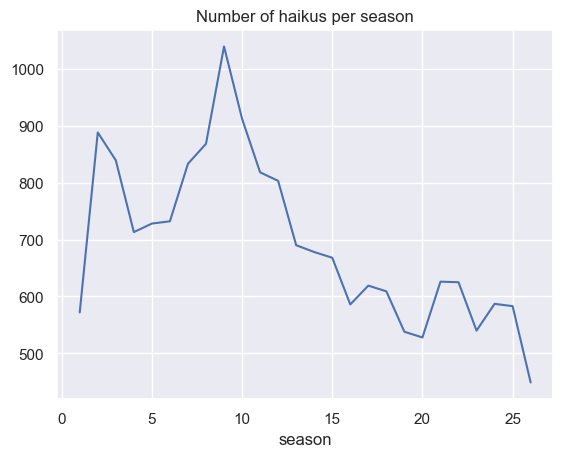

In [14]:
# Distribution by Season
import seaborn as sns
sns.set()

haiku_df.groupby('season').count()['id_x'].plot()
plt.title('Number of haikus per season')

In [15]:
# Which episode(s) have the most haikus?
haiku_df.reset_index().groupby('episode_id')[['title', 'season', 'number_in_season']].value_counts().sort_values(ascending=False)

episode_id  title                      season  number_in_season
9           Life on the Fast Lane      1       9                   63
203         Natural Born Kissers       9       25                  61
206         Bart the Mother            10      3                   59
255         The Great Money Caper      12      7                   59
14          Bart Gets an "F"           2       1                   59
                                                                   ..
543         The Man Who Grew Too Much  25      13                  14
337         All's Fair in Oven War     16      2                   13
112         Homer Badman               6       9                   13
286         Gump Roast                 13      17                  13
189         All Singing, All Dancing   9       11                  12
Length: 564, dtype: int64

b'Skipping line 8084: expected 13 fields, saw 20\nSkipping line 52607: expected 13 fields, saw 21\nSkipping line 59910: expected 13 fields, saw 21\n'
b'Skipping line 71801: expected 13 fields, saw 20\nSkipping line 73539: expected 13 fields, saw 21\nSkipping line 77230: expected 13 fields, saw 21\nSkipping line 78953: expected 13 fields, saw 21\nSkipping line 81138: expected 13 fields, saw 20\nSkipping line 86746: expected 13 fields, saw 22\nSkipping line 101154: expected 13 fields, saw 21\nSkipping line 115438: expected 13 fields, saw 20\nSkipping line 117573: expected 13 fields, saw 22\nSkipping line 130610: expected 13 fields, saw 22\n'
b'Skipping line 152970: expected 13 fields, saw 22\nSkipping line 153017: expected 13 fields, saw 20\nSkipping line 153018: expected 13 fields, saw 30\nSkipping line 154080: expected 13 fields, saw 20\nSkipping line 154082: expected 13 fields, saw 20\nSkipping line 154084: expected 13 fields, saw 20\nSkipping line 154086: expected 13 fields, saw 20\n

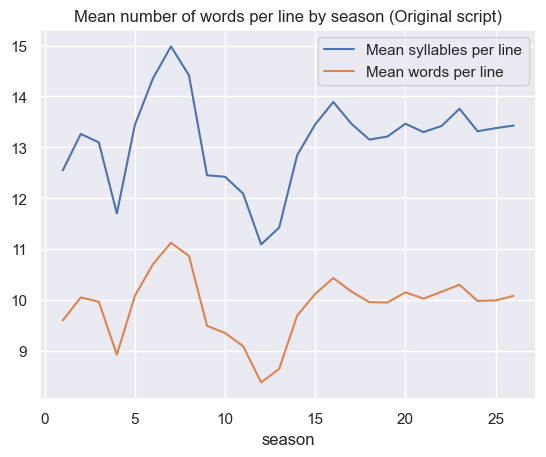

In [16]:
base_script = pd.read_csv('dataset/simpsons_script_lines.csv', error_bad_lines=False).dropna(subset=['word_count'])
episode_data = pd.read_csv('dataset/simpsons_episodes.csv')[['id', 'title', 'season', 'number_in_season']]
base_script = pd.merge(base_script, episode_data, how='left', left_on='episode_id', right_on='id')

base_script['n_syllables'] = base_script.spoken_words.progress_apply(simpsons_haiku.count_syllables_line)
base_script.groupby('season')['n_syllables'].mean().plot(label='Mean syllables per line')
base_script.groupby('season')['word_count'].mean().plot(label='Mean words per line')

plt.title('Mean number of words per line by season (Original script)')
plt.legend()

<AxesSubplot:title={'center':'Mean number of syllables per word by season'}, xlabel='season'>

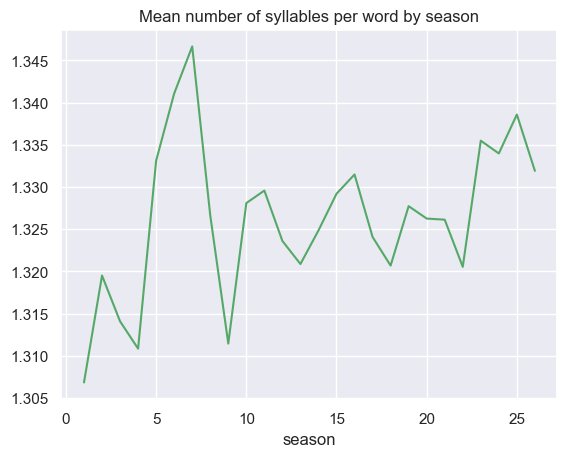

In [17]:
# This the ratio of the two lines above
plt.title('Mean number of syllables per word by season')
(base_script.groupby('season')['n_syllables'].sum() / base_script.groupby('season')['word_count'].sum()).plot(color='g')

In [23]:
# Distribution of haikus by syllable count of constituent diaglogue lines
haiku_df.n_syllables.value_counts().head(20)

[17]         1652
[9, 8]        472
[5, 12]       470
[8, 9]        435
[10, 7]       434
[12, 5]       419
[7, 10]       413
[11, 6]       377
[4, 13]       327
[6, 11]       292
[3, 14]       238
[13, 4]       218
[2, 15]       206
[15, 2]       204
[14, 3]       191
[5, 7, 5]     149
[16, 1]       134
[5, 6, 6]     120
[1, 16]       110
[5, 5, 7]     110
Name: n_syllables, dtype: int64

## Generating haikus
This section generates haikus, demonstrating the usage of the `syllable_patterns` and `golden_age` parameters.

In [19]:
# Higher quality haikus
haiku, metadata = simpsons_haiku.generate_haiku(syllable_patterns=[[5,12]])#[5,7,5], [17], [5, 12], [12, 5]])
print('{}, S{:02d}E{:02d}'.format(metadata['n_syllables'].values[0], metadata['season'].values[0], metadata['number_in_season'].values[0]))
print(haiku)

[5, 12], S15E16
one harmonica
perfect mood setter for the
end of your freedom


In [20]:
# Medium quality? Two line breaks
haiku, metadata = simpsons_haiku.generate_haiku(syllable_patterns=[[9, 8], [8, 9], [10, 7], [7, 10]])
print('{}, S{:02d}E{:02d}'.format(metadata['n_syllables'].values[0], metadata['season'].values[0], metadata['number_in_season'].values[0]))
print(haiku)

[9, 8], S02E09
I'll tell you what I'm
going to do I'm going
to write a letter


In [21]:
# Lower quality haikus
haiku, metadata = simpsons_haiku.generate_haiku(syllable_patterns=[[4, 7, 6]])
print('{}, S{:02d}E{:02d}'.format(metadata['n_syllables'].values[0], metadata['season'].values[0], metadata['number_in_season'].values[0]))
print(haiku)

[4, 7, 6], S24E15
Come on people You're
safe as Sunday with me I
wouldn't hurt a fly


## Appendix

This section demonstrates some the functionality associated with the SimpsonsTwitterBot class, particularly querying GIFs from the Frinkiac API via the package `compuglobal`, as well as debugging.

In [31]:
from twitter import SimpsonsTwitterBot

# Generate frinkiac gifs and images from a haiku - S4E17 Last Exit to Springfield
haiku_query = """It doesn't take a
                 whiz to see that you're looking 
                 out for number one"""

simpsons_bot = SimpsonsTwitterBot(
        auth_dict=json.load(open('auth.json')), 
        haiku_df='haiku_df.csv'
    )

image_url, gif_url, mp4_url = simpsons_bot.search_frinkiac(haiku_query, episode_key='S04E17')

In [27]:
import compuglobal 
simpsons = compuglobal.Frinkiac()


episode_key = 'S{:02d}E{:02d}'.format(metadata['season'].values[0], metadata['number_in_season'].values[0])

gif_url, image_url = None, None
search_results = simpsons.search(haiku)
for result in search_results:
    if result.key == episode_key:
        screencap = simpsons.get_screencap(result.key, 
                                           result.timestamp)
        image_url = screencap.get_image_url()
        gif_url = screencap.get_gif_url()
        
        break

In [32]:
image_url

'https://frinkiac.com/img/S04E17/827075.jpg'

In [33]:
gif_url

'https://frinkiac.com/gif/S04E17/824156/831046.gif?b64lines=IEFORCBJIFdBTlQgVE8gVEFLRSBUSEUKIFBSRVNTVVJFIE9GRi4='

In [34]:
mp4_url

'https://frinkiac.com/mp4/S04E17/824156/831046.mp4?b64lines=IEFORCBJIFdBTlQgVE8gVEFLRSBUSEUKIFBSRVNTVVJFIE9GRi4='

In [35]:
for word in "Oh Mr Pigeon I'd kiss you if you weren't swimming with disease".split():
    print(word, simpsons_haiku.num_syllables(word))

Oh 1
Mr 2
Pigeon 2
I'd 1
kiss 1
you 1
if 1
you 1
weren't 1
swimming 2
with 1
disease 2


In [36]:
# Search script for line - used in debugging
def fun(x):
    if isinstance(x, float):
        return False
    else:
        return 'F.O' in x
    
base_script[base_script.spoken_words.apply(fun)].spoken_words.values

array(["There's a U.F.O. outside my window!! Seriously!",
       'Can I sit on the roof with a baseball bat in case a U.F.O. does come?',
       "I'm getting this book on U.F.O.s.",
       'We got a report that a Lisa Simpson spotted a U.F.O...',
       "I didn't see any U.F.O.!"], dtype=object)